# Categorical Plots

    Here, the focus would be on comparing a Categorical column with another either categorical or numerical column.

In [1]:
import seaborn as sns

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Barplot
'A Group by' plot

<AxesSubplot:xlabel='sex', ylabel='tip'>

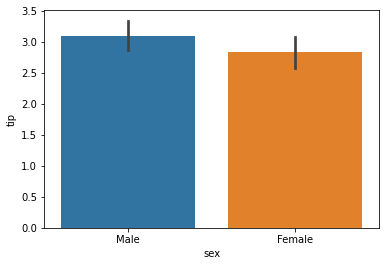

In [8]:
sns.barplot(x= 'sex', y= 'tip', data=tips)

##### This actually shows you the mean of Categorical value to the Numerical values.

    By default it estimates or plots the values by calculating the 'mean'.
    -> To change the aggregate function (mean) you can change that from 'estimator' parameter.
 
Example:

In [3]:
import numpy as np

<AxesSubplot:xlabel='sex', ylabel='tip'>

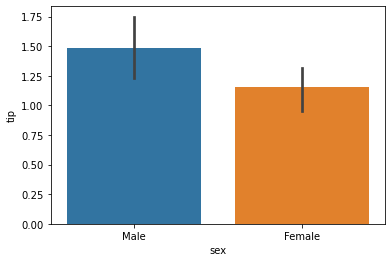

In [10]:
sns.barplot(x= 'sex', y= 'tip', data= tips, estimator= np.std)

We can also create our own aggregate function if we want!

In [17]:
np.std(tips[tips['sex'] == 'Male']['tip'])

1.484351875699332

In [18]:
np.mean(tips[tips['sex'] == 'Male']['tip'])

3.0896178343949052

###  

## Count Plot
Exactly freaking same as Barplot but **Y is the count of X** by default and not have to be defined.

<AxesSubplot:xlabel='sex', ylabel='count'>

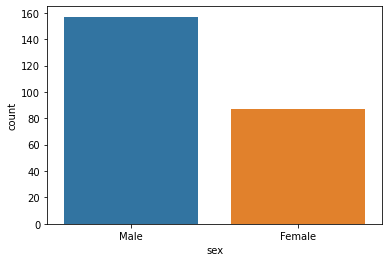

In [19]:
sns.countplot(x= 'sex', data= tips)

<AxesSubplot:xlabel='count', ylabel='sex'>

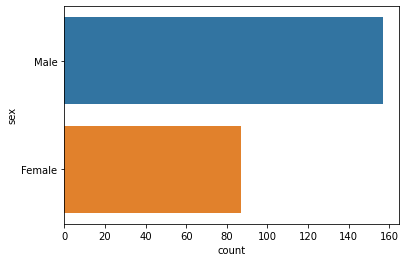

In [22]:
sns.countplot(y='sex', data= tips)

##### Eh, putting value 'y' will plot Horizontally and 'x' vertically!
And providing both will result in Error!

#  

## Box plot
'Whisker Plot'

<AxesSubplot:xlabel='tip'>

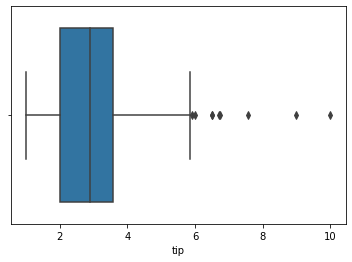

In [6]:
sns.boxplot(x= 'tip', data= tips)

# Box Plot નો હાઉ દુર થશે, માત્ર આ વાંચ...
So easy.

    The plot shown above is on just a single data range i.e. x = [2,5,3,6,1]
    If you want to make a common plot which can be seen commonly containing multible boxes on the same plot,
    then you have to take multiple data ranges like tip = [33,55,66,78,77,88] (for y axis)
                                                    day = ['Sun','Mon','Tue'...] (for x axis)
                                                    
                                                    And if you want to take only single data range, then,
                                                    you have to take the numerical data, instead of categorical
                                                    like 'Sunday' and so on...
                                                    
**Theory: What happens in the backside?**

    Basically, it is 'A Median Plot'. I would say it is. Because it shows the 3 types of median for every 
    data range.
    
    Here, first, what is median...
    Let's say:
        scores = [15,34,12,45,67,23,15,66]
        
    Now, to find a median, we have to sort the data first.
    Now,
        scores = [12,15,15,23,34,45,66,67]
    Now, we can find the median out of this.
    
12,15,15,<font size=5> 23,34, </font> 45,66,67
             
Now, their average 23 + 34 = 57 / 2 = 28.5

That's why, 28.5 is the Median.

    To find the Q1 and Q3... (M == Q2)
    
    First half = 12,15,15,23
    Second half = 24,45,66,67
    
    Follow the same process of finding a median from First half and Second Half.
    Then you will get Q1 = 15
                      Q3 = 55.5
                      
    
    So, now we have everything to put in the plot!
    
    Things to put
    -------------
    
        |                        |  
        |          ---------     |
        |          |    |  |     |
        |----------|    |  |-----|
        |          |    |  |     |
        |          ---------     |
        |                        |
    
    Lowest         Q1   M  Q3    Highest
    
    
    Lowest = 12
    Highest = 67
    
    Q1 = 15
    M  = 28.5
    Q3 = 55.5
    
    
#### And yes, the thing that you may ask... 
If the median is the middle observation in the data range, then why that line in the middle of the box is not exactly in the middle?

<font color='green'> The Answer: </font> <br>
That is because the plot (chart) will have the X or Y axis divided in the SAME slots or Bins, like 5-10, 10-15...
And it is not feasible to make bins that much fitting to the median line, so the median line will not be in the exactly in the middle in the chart but, it is in the middle!

## Now, let's see how multiple data can be shown in the chart at a time...
    

In [31]:
(23 + 34) / 2

28.5

<AxesSubplot:xlabel='sex', ylabel='tip'>

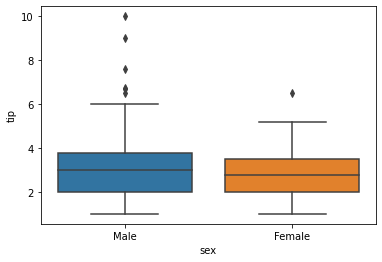

In [12]:
sns.boxplot(x= 'sex', y='tip', data= tips)

### Another comparision

<AxesSubplot:xlabel='day', ylabel='tip'>

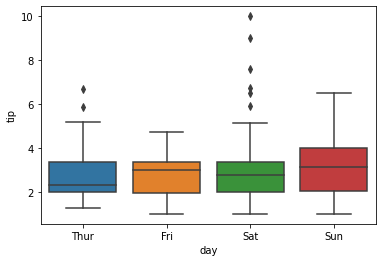

In [14]:
sns.boxplot(y= 'tip', x= 'day', data= tips)

## A good thing,
is that, you can also give a **hue** parameter to see data in more detail.

<AxesSubplot:xlabel='day', ylabel='tip'>

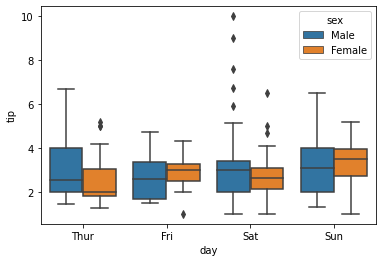

In [20]:
sns.boxplot(x='day', y='tip', data= tips, hue='sex')

###  

###  

## Violin Plots
'Really easy to understand if you rotate it"

<AxesSubplot:xlabel='day', ylabel='tip'>

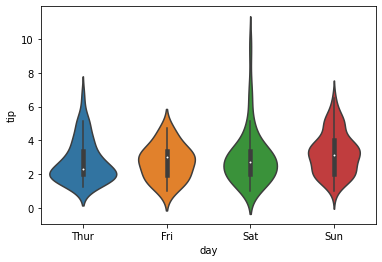

In [23]:
sns.violinplot(x= 'day', y= 'tip', data= tips)

#### Rotate to understand

<AxesSubplot:xlabel='tip', ylabel='day'>

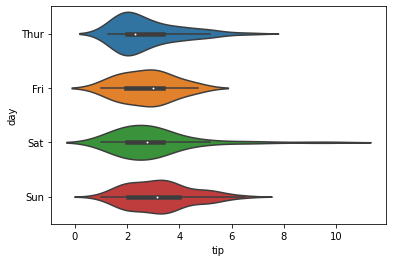

In [22]:
sns.violinplot(y= 'day', x= 'tip', data= tips)

#### Both, box and violin plot take a same number of arguments (Violin takes more and differnet than box and box also differs from violin, but the promary arguments are the same)

    Now, as usual, we can provide the HUE to separate the information

<AxesSubplot:xlabel='tip', ylabel='day'>

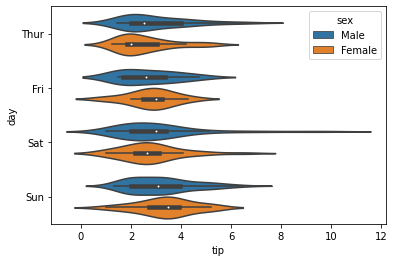

In [44]:
sns.violinplot(y= 'day', x= 'tip', data= tips, hue='sex')

#### How massy, it has become! Even if you do not rotate it...

<AxesSubplot:xlabel='day', ylabel='tip'>

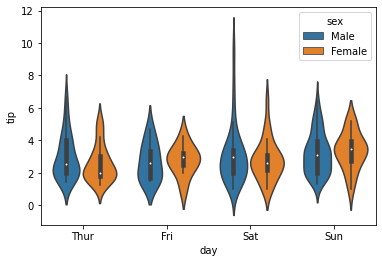

In [46]:
sns.violinplot(x='day', y='tip',data= tips, hue='sex')

### See? Still aquires space...
# We would have worked if it was box plot.
But it is violin plot, we have a **technique** to make it a lot better.

**Just give split=True**

<AxesSubplot:xlabel='day', ylabel='tip'>

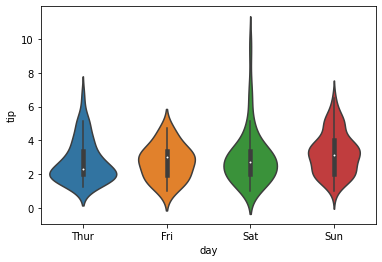

In [47]:
sns.violinplot(x='day', y='tip', data= tips, split = True)

### WTFun? It did't work!
It will work, just it needs a friend called **hue**

<AxesSubplot:xlabel='day', ylabel='tip'>

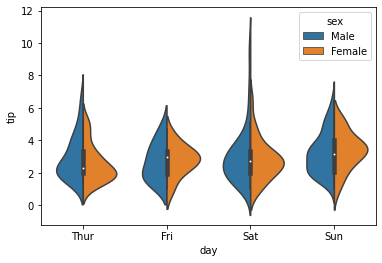

In [48]:
sns.violinplot(x='day', y='tip', data= tips, hue='sex', split = True)

### How cool and efficent!
So, split will work with HUE only.

###  

###  

## Strip plot
'I want to see the data !!!'

<AxesSubplot:xlabel='day', ylabel='tip'>

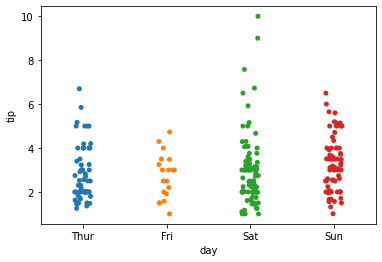

In [54]:
sns.stripplot(x= 'day', y='tip', data= tips)                      # Use jitter=False to get them in the stacked order

#### HUE and SPLIT are also here!
### Just HUE

<AxesSubplot:xlabel='day', ylabel='tip'>

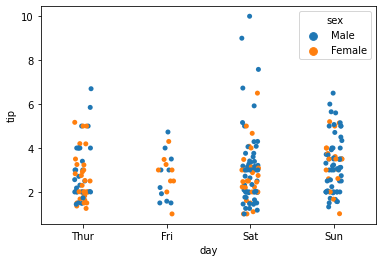

In [58]:
sns.stripplot(x= 'day', y='tip', data= tips, hue='sex')

### With SPLIT

<AxesSubplot:xlabel='day', ylabel='tip'>

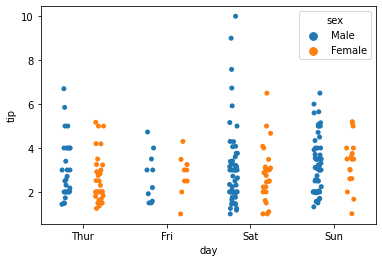

In [62]:
sns.stripplot(x= 'day', y='tip', data= tips, hue='sex', dodge=True) #Split is renamed to dodge... but split will work!

###  

###  

##  Swarm plot... I mean, really?
'I want TO SEE DATA!!!'

<AxesSubplot:xlabel='day', ylabel='tip'>

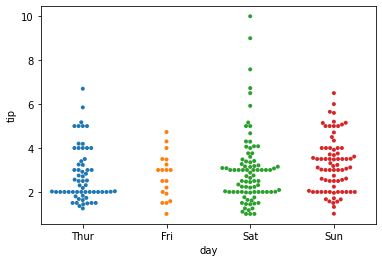

In [77]:
# I have provided the size=4 because default is 5 and with that sns can't show every single datapoint
sns.swarmplot(x= 'day', y='tip', data= tips, size=4)

<AxesSubplot:xlabel='day', ylabel='tip'>

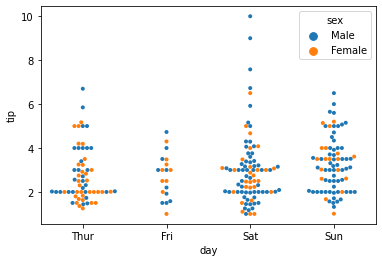

In [76]:
sns.swarmplot(x= 'day', y='tip', data= tips, size=4, hue='sex')#Split is also here but you may want to decrease size 

### Some people can also get crazy to see MORE DATA, we will combine the swarm and violin together

<AxesSubplot:xlabel='day', ylabel='tip'>

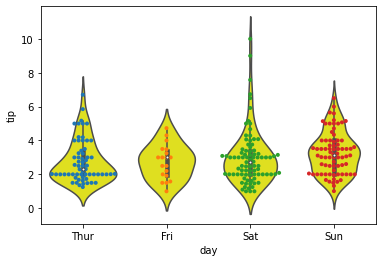

In [80]:
sns.swarmplot(x= 'day', y='tip', data= tips, size=4)
sns.violinplot(x= 'day', y='tip', data= tips, color='yellow')

<AxesSubplot:xlabel='day', ylabel='tip'>

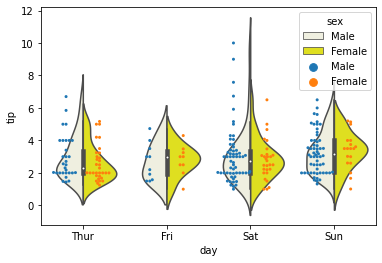

In [86]:
sns.swarmplot(x= 'day', y='tip', data= tips, size=3, hue='sex', dodge=True)
sns.violinplot(x= 'day', y='tip', data= tips, color='yellow', hue='sex', split=True)

###  

###  

###  

#  These many plots we have learnt so far in this book

- Barplot
- Countplot
- Boxplot
- Violinplot
- Stripplot
- Swarmplot

### So many plots huh?
But wait, there is one more waiting for us to digest.
<br> <br>
## Factor plot
'I am All Plots'

    Get this message when you run sns.fatorplot()
    ---------------------------------------------
    
    C:\Users\GIGABYTE\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` 
    function has been renamed to `catplot`. The original name will be removed in a future release. Please 
    update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in 
    `catplot`.

### Using 'catplot' instead of 'factorplot'

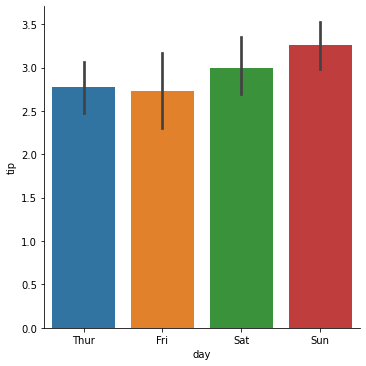

In [89]:
sns.catplot(x= 'day', y='tip', data= tips, kind= 'bar')

### See, factorplot i.e catplot is the kin`g` - kin`d` of all plots

    What if we do not provide kind parameter at all?
    
    In sns.factorplot() -> kind = 'point' is default
    In sns.catplot() -> kind = 'strip' is default



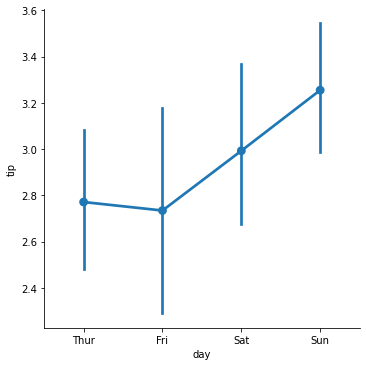

In [92]:
sns.catplot(x= 'day', y='tip', data= tips, kind='point')   #Example of POINT

###  

###  

###  So, here!
I know it was a lot, and this book may felt you a little longer... but you know I am a data scientist, I have to dig into the details to understand the underlying logics.

Next up... we will cover the Matrix Plots.